<img src="images\Logo_UCLL_ENG_RGB.png" style="background-color:white;" />

# Data Analytics & Machine learning

Lecturers: Aimée Lynn Backiel, Chidi Nweke, Daan Nijs

Academic year 2023-2024

## Lab 3: Data analytics with Pandas

### Lecture outline

1. Recap last week
2. Introduction to the case
3. Data exploration using Pandas
   1. Univariate analysis
   2. Bivariate analysis

### Recap of last lecture(s)

#### Lab 1

1. We ensured we had a valid Python installation.
2. We learnt what a virtual environment is:
   * Isolated Python executable and packages.
   * We created a virtual environment.
3. Absolute path vs relative path recap.
4. Recap of data structures in Python

#### Lab 2
1. Installed Pandas
2. Learnt how to read data
3. Learnt how to calculate mean, mode, median etc.
4. Basic exploration of the 4 variables

### The case

Ada Turing Travelogue, or as everyone calls her, Ada just started working part time at her parents travel agency. She has a keen understanding and interest of everything related to applied computer science ranging from server & system management to full stack software development. Through database foundations she already understands how to query data and programming 1 and 2 covered the essentials about the Python programming language. Recently she has just decided to start learning about data analytics & machine learning as well.

She uses her skills to connect to the travel agency's database where she finds many, normalized, tables. Ada recalls what she learnt in database foundations and performs all the correct joins. Afterwards she saves the data in the `data/` folder.


She finds the following dataset:

| Column Name          | Description                                                                                       |
| -------------------- | ------------------------------------------------------------------------------------------------- |
| SalesID              | Unique identifier for each sale.                                                                  |
| Age                  | Age of the traveler.                                                                              |
| Country              | Country of origin of the traveler.                                                                |
| Membership_Status    | Membership level of the traveler in the booking system; could be 'standard', 'silver', or 'gold'. |
| Previous_Purchases   | Number of previous bookings made by the traveler.                                                 |
| Destination          | Travel destination chosen by the traveler.                                                        |
| Stay_length          | Duration of stay at the destination.                                                              |
| Guests               | Number of guests traveling (including the primary traveler).                                             |
| Travel_month         | Month in which the travel is scheduled.                                                           |
| Months_before_travel | Number of months prior to travel that the booking was made.                                       |
| Earlybird_discount   | Boolean flag indicating whether the traveler received an early bird discount.                     |
| Package_Type         | Type of travel package chosen by the traveler.                                                    |
| Cost                 | Calculated cost of the travel package.                                                            |
| Margin | The cost (for the traveler) - what the travel agency pays. |
 | Additional_Services_Cost| The amount of additional services (towels, car rentals, room service, ...) that was bought during the trip. |


### Helping Ada explore the dataset

The main goal for the remainder of this lab is to explore the data. We will specifically take four columns:

* Cost
* age
* stay length
* Destination

Our goal is to find interesting relationships between them.

As was covered in the book and lecture there are to main data types in analytics: categorical and continuous data. This is a crucial first step in your analysis because it determines what methods make sense on your data.


**The goal is primarily to find out what influences the cost of the stay.**

### Introduction to Pandas

#### Reading and exploring data

In [1]:
import pandas as pd # by convention
pd.options.display.float_format = '{:.2f}'.format

In [2]:
travel_dataset = pd.read_csv("data/lab_3_dataset.csv")

One of the first things you typically do with a dataset is print out the first few rows. 

In [3]:
travel_dataset.head()

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost
0,0,1,47,UK,silver,1,Sydney,4,2,7,1,False,Adventure,1706.09,6,1219.74,291.06
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52
2,2,3,49,USA,standard,2,Sydney,3,4,7,1,False,Cultural,2829.92,6,2360.49,285.36
3,3,4,62,Spain,silver,2,Cape Town,7,2,1,3,True,Adventure,2789.53,7,2315.66,747.53
4,4,5,36,Germany,silver,3,Paris,9,3,2,7,False,Adventure,5358.00,5,5042.14,1117.09


Accessing the columns is equally trivial.

In [4]:
travel_dataset.columns

Index(['Unnamed: 0', 'sales_id', 'age', 'country', 'membership_status',
       'previous_purchases', 'destination', 'stay_length', 'guests',
       'travel_month', 'months_before_travel', 'earlybird_discount',
       'package_Type', 'cost', 'rating', 'margin', 'additional_services_cost'],
      dtype='object')

In [5]:
travel_dataset[["country", "stay_length", "age", "cost"]]


,country,stay_length,age,cost
0,UK,4,47,1706.09
1,Italy,4,37,281233.19
2,USA,3,49,2829.92
3,Spain,7,62,2789.53
4,Germany,9,36,5358.00
...,...,...,...,...
9995,Germany,11,59,7504.78
9996,Australia,6,18,1427.12
9997,USA,5,29,3458.86
9998,USA,16,47,18392.27


To get multiple columns at once we need to pass in a list of columns

In [6]:
columns = ["country", "stay_length", "age", "cost"]
travel_dataset_subset = travel_dataset[columns]
travel_dataset_subset

,country,stay_length,age,cost
0,UK,4,47,1706.09
1,Italy,4,37,281233.19
2,USA,3,49,2829.92
3,Spain,7,62,2789.53
4,Germany,9,36,5358.00
...,...,...,...,...
9995,Germany,11,59,7504.78
9996,Australia,6,18,1427.12
9997,USA,5,29,3458.86
9998,USA,16,47,18392.27


#### Data exploration: univariate

We will continue the exploration of our country, destination, stay_length, age and cost variables.

1. We will start with a univariate analysis, which means we will explore one (uni) variable (variate) at a time. 
2. Later on we will move to two (bi) variables (variate) analyses 
3. We round it up with methods that are able to do multivariate analysis. 

Recall that 

1. **Categorical variables** represent categories or labels (e.g., colors, genders). 
2. **Numeric variables** represent quantities and can be ordered or measured (e.g., age, height). 
3. There is a special case called **Ordinal variables**, these are categories where there is a meaningful order (e.g., clothes sizes: small, medium and large).

#### summarizing numeric data

💻📊💡 TIP: the names of the functions are intuitive. For instance `dataframe[column].min()` gets the minimum of that column. It is equivalent to `select min(column) from dataframe` in SQL. Knowing SQL makes it easy to translate back and forth.

💻📊💡 TIP: become good friends with the <a href=./Pandas_Cheat_Sheet.pdf>the cheat sheet</a> and the documentation

In [7]:
travel_dataset["age"].mean()

39.9759

In [8]:
travel_dataset["age"].median()

39.0

In [9]:
travel_dataset["age"].min()

18

In [10]:
travel_dataset["age"].max()

80

In [11]:
travel_dataset["age"].std()

14.001640039023222

###### Cost

In [12]:
travel_dataset["cost"].mean()

114814.73843388166

In [13]:
travel_dataset["cost"].min()

-1000000.0

In [14]:
travel_dataset["cost"].max()

6724039.169066888

In [15]:
travel_dataset["cost"].median()

4845.140257645777

In [16]:
travel_dataset["cost"].std()

457712.60775489296

###### stay length

In [17]:
travel_dataset["stay_length"].mean()

10.4914

In [18]:
travel_dataset["stay_length"].min()

1

In [19]:
travel_dataset["stay_length"].max()

68

In [20]:
travel_dataset["stay_length"].median()

9.0

In [21]:
travel_dataset["stay_length"].std()

7.053516941932231

##### 💻📊💡 TIP: there are better ways to do this

In [22]:
# Good
travel_dataset[["age","stay_length", "cost"]].min()

age                 18.00
stay_length          1.00
cost          -1000000.00
dtype: float64

In [23]:
import numpy as np

In [24]:
# Better
# Notice how we are passing a list of functions in aggregate
travel_dataset[["age","stay_length", "cost"]].aggregate([np.mean, np.max, np.median, np.min])

,age,stay_length,cost
mean,39.98,10.49,114814.74
amax,80.00,68.00,6724039.17
median,39.00,9.00,4845.14
amin,18.00,1.00,-1000000.00


In [25]:
# Best
travel_dataset[["age","stay_length", "cost"]].describe()

,age,stay_length,cost
count,10000.00,10000.00,10000.00
mean,39.98,10.49,114814.74
std,14.00,7.05,457712.61
min,18.00,1.00,-1000000.00
25%,29.00,5.00,2414.47
50%,39.00,9.00,4845.14
75%,50.00,14.00,10222.98
max,80.00,68.00,6724039.17


##### ❓ Does anything strike you as odd? 

There is a large difference between the mean and median cost. This is likely an indication of outliers. We will have to investigate this further.

##### summarizing categorical data

💻📊💡 TIP: `dataframe[column].value_counts()` is a very powerful method. It is equivalent to `select column, count(column) from dataframe group by column`. If you forget `value_counts()` exists you can get there using your SQL knowledge. `dataframe.groupby("column").count()` also gets you very close.

In [26]:
travel_dataset["country"].value_counts()

country
UK           1320
Italy        1274
USA          1267
France       1266
Spain        1265
Australia    1222
Canada       1214
Germany      1172
Name: count, dtype: int64

In [27]:
travel_dataset["destination"].value_counts()

destination
Rio          1293
Sydney       1275
Cairo        1271
Paris        1259
Tokyo        1252
New York     1229
Cape Town    1224
Rome         1197
Name: count, dtype: int64

#### Data exploration: bivariate

##### ❓ What pairs of variables do you think are interesting to look at?


Age and Cost

Cost and Country

Stay length and Cost

##### ❓ What methods can you use to do this?

Categorical + continuous

* Group by aggregation function

Categorical + Categorical

* Frequency table

Continuous + continuous 

* Correlation

##### ❓ Carry out these analyses

💻📊💡 TIP: Things like  `dataframe[["column1", "column2"]].groupby("column1").agg(["min", "max"])` are valid Pandas.

 In SQL this would be `select column1, min(column2), max(column2) from dataframe group by column1`.

💻📊💡 TIP: `dataframe[columns].groupby(col1).describe()` is possible

💻📊💡 TIP: <a href=https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html>Look at</a> `pd.crosstab()`

In [28]:
travel_dataset[["country", "cost"]].groupby("country").agg(["min", "max", "median", "mean"])

cost                             
                  min        max  median      mean
country                                           
Australia -1000000.00 6057070.02 4694.58 101492.50
Canada    -1000000.00 3449114.18 4773.98 113657.72
France    -1000000.00 5190741.80 5439.27 111611.85
Germany   -1000000.00 5997567.85 5158.53 118083.26
Italy     -1000000.00 6724039.17 4771.74 109234.36
Spain     -1000000.00 3933809.07 4708.53 114290.41
UK        -1000000.00 3891507.65 4796.86 122519.59
USA       -1000000.00 5945497.65 5181.35 127056.91

In [29]:
travel_dataset[["destination", "cost"]].groupby("destination").agg(["min", "max", "median", "mean", "std"])

cost                                         
                    min        max    median      mean       std
destination                                                     
Cairo       -1000000.00   43707.46   4216.37  -3599.38  97458.54
Cape Town   -1000000.00   30977.86   4102.03  -7622.93 114350.91
New York    -1000000.00   50263.48   4534.42  -2176.54  90572.01
Paris       -1000000.00   48416.78   4656.95  -3527.71  97920.70
Rio         -1000000.00   41355.67   3961.99  -4781.88 100440.10
Rome        -1000000.00   56969.50   4209.89  -3456.09  96146.58
Sydney      -1000000.00   36791.09   3989.17  -4994.68 101119.97
Tokyo       -1000000.00 6724039.17 706551.82 947170.23 901159.24

In [30]:
pd.crosstab(travel_dataset['country'], travel_dataset['destination'], margins=True)


destination,Cairo,Cape Town,New York,Paris,Rio,Rome,Sydney,Tokyo,All
country,,,,,,,,,
Australia,151,158,169,135,158,162,149,140,1222
Canada,154,149,142,153,184,138,141,153,1214
France,159,152,134,171,159,155,159,177,1266
Germany,152,139,147,161,152,126,150,145,1172
Italy,182,165,157,149,146,158,176,141,1274
Spain,144,165,152,163,155,159,168,159,1265
UK,173,156,166,166,173,150,172,164,1320
USA,156,140,162,161,166,149,160,173,1267
All,1271,1224,1229,1259,1293,1197,1275,1252,10000


In [31]:
travel_dataset[["age", "cost", "stay_length"]].corr()

,age,cost,stay_length
age,1.00,0.03,0.00
cost,0.03,1.00,0.22
stay_length,0.00,0.22,1.00


In [32]:
travel_dataset[["cost", "destination", "age", "stay_length"]].groupby("destination").mean()

,cost,age,stay_length
destination,,,
Cairo,-3599.38,39.87,10.62
Cape Town,-7622.93,40.13,10.52
New York,-2176.54,39.78,10.73
Paris,-3527.71,39.82,10.85
Rio,-4781.88,39.66,9.94
Rome,-3456.09,39.57,10.37
Sydney,-4994.68,40.05,9.95
Tokyo,947170.23,40.91,10.97


##### ❓ Are there combinations you find suspicious, if so which?

* The values for Japan are a lot higher. 

* There seems to be a large negative number.

##### ❓ How would you deal with this?

* The large negative number is likely some sort of incorrect data.
  
* The values from Japan seem to be a lot higher. For this kind of thing it's handy to ask people with business insight what's going on.

####  Subsetting and cleaning data

Ada gets confirmation from her contacts that the data has some issues. The booking system broke down and produced large negative values Additionally, the currency converter for the latest destination broke down.

We will help her rectify these mistakes.

#####  Removing data: boolean indexing

Generally it's a good idea to not alter your original dataset but filter it in a copy. The way Pandas does this is by filtering with a boolean mask. We will demonstrate step by step how to do this.

The data we want gone are the rows where the cost equals `-1000000.00`. We can check for each row if that's the case. 

Pandas uses a technique called "broadcasting" where if you try to do operations between values of different shapes Pandas will try to expand one to make them match.

This means you don't need to explicitly turn the value into an array of the same size.

<center>
<img src="https://numpy.org/doc/stable/_images/broadcasting_1.png" style="background-color:white;">
</center>

In [33]:
non_errors = travel_dataset["cost"] != -1000000.00
non_errors

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: cost, Length: 10000, dtype: bool

Pandas allows you to give a boolean array as an index to filter out rows. The rows where the boolean array (also known as a mask) is `True` are kept. 

In [34]:
travel_dataset[non_errors] 

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost
0,0,1,47,UK,silver,1,Sydney,4,2,7,1,False,Adventure,1706.09,6,1219.74,291.06
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52
2,2,3,49,USA,standard,2,Sydney,3,4,7,1,False,Cultural,2829.92,6,2360.49,285.36
3,3,4,62,Spain,silver,2,Cape Town,7,2,1,3,True,Adventure,2789.53,7,2315.66,747.53
4,4,5,36,Germany,silver,3,Paris,9,3,2,7,False,Adventure,5358.00,5,5042.14,1117.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,59,Germany,standard,3,Cape Town,11,3,8,1,True,Adventure,7504.78,7,7045.05,1602.18
9996,9996,9997,18,Australia,standard,1,Sydney,6,1,7,1,True,Relaxation,1427.12,7,1051.24,395.36
9997,9997,9998,29,USA,silver,3,Paris,5,3,12,2,True,Adventure,3458.86,5,2945.36,539.41
9998,9998,9999,47,USA,standard,5,Paris,16,5,8,3,False,Relaxation,18392.27,5,17968.59,5247.25


In [35]:
len(travel_dataset) - len(travel_dataset[non_errors])

100

In [36]:
_dataset_cleaned = travel_dataset[non_errors]

##### ❓ Make a mask for the people that traveled to Tokyo. Call the variable tokyo.

In [37]:
tokyo = _dataset_cleaned["destination"] == "Tokyo"

#####  Updating rows the right way

We can now grab the rows where the destination is Tokyo as follows

In [38]:
_dataset_cleaned[tokyo]

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52
6,6,7,63,Italy,silver,4,Tokyo,1,1,6,1,False,Cultural,37424.42,7,-89.33,81.53
7,7,8,51,Spain,silver,3,Tokyo,11,2,7,3,True,Adventure,810452.74,5,4882.30,1509.58
11,11,12,33,Australia,standard,3,Tokyo,4,3,7,5,True,Adventure,445455.58,7,2574.81,738.01
27,27,28,45,Spain,silver,4,Tokyo,19,3,2,11,True,Relaxation,1796515.55,6,11144.05,3772.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,9936,9937,44,Australia,gold,5,Tokyo,2,2,8,14,True,Cultural,143747.78,8,798.81,123.23
9958,9958,9959,49,Australia,standard,1,Tokyo,9,1,8,3,False,Adventure,320119.76,6,1727.44,702.34
9965,9965,9966,47,Spain,standard,2,Tokyo,5,2,2,1,False,Adventure,324200.00,5,1661.63,494.94
9986,9986,9987,34,Italy,standard,3,Tokyo,5,3,12,8,False,Relaxation,535010.48,6,3011.18,875.61


This gives us a filtered dataset we can now grab the cost column from

In [39]:
_dataset_cleaned[tokyo]["cost"]

1       281233.19
6        37424.42
7       810452.74
11      445455.58
27     1796515.55
          ...    
9936    143747.78
9958    320119.76
9965    324200.00
9986    535010.48
9991     67273.96
Name: cost, Length: 1239, dtype: float64

Now we have the rows we can convert the currency by dividing by 158. You will likely attempt to do the following

`_dataset_cleaned[tokyo]["cost"] /= 158`

In [40]:
_dataset_cleaned[tokyo]["cost"] /= 1

C:\Users\u0140497\AppData\Local\Temp\ipykernel_25296\727726227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _dataset_cleaned[tokyo]["cost"] /= 1


This gives us the same error as we encountered in the previous session. The way we can get around is is by using `data.loc`.

`df.loc` can be quite confusing. It is an object you can slice by using square brackets `[]`. The first element is the **index**. This is typically the column on the far left.

In [41]:
_dataset_cleaned.index # Each dataframe has an index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', length=9900)

In [42]:
tokyo.index # Each series has an index too

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', length=9900)

In [43]:
_dataset_cleaned.loc[tokyo] # Loc filters the dataset where Tokyo is true

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52
6,6,7,63,Italy,silver,4,Tokyo,1,1,6,1,False,Cultural,37424.42,7,-89.33,81.53
7,7,8,51,Spain,silver,3,Tokyo,11,2,7,3,True,Adventure,810452.74,5,4882.30,1509.58
11,11,12,33,Australia,standard,3,Tokyo,4,3,7,5,True,Adventure,445455.58,7,2574.81,738.01
27,27,28,45,Spain,silver,4,Tokyo,19,3,2,11,True,Relaxation,1796515.55,6,11144.05,3772.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,9936,9937,44,Australia,gold,5,Tokyo,2,2,8,14,True,Cultural,143747.78,8,798.81,123.23
9958,9958,9959,49,Australia,standard,1,Tokyo,9,1,8,3,False,Adventure,320119.76,6,1727.44,702.34
9965,9965,9966,47,Spain,standard,2,Tokyo,5,2,2,1,False,Adventure,324200.00,5,1661.63,494.94
9986,9986,9987,34,Italy,standard,3,Tokyo,5,3,12,8,False,Relaxation,535010.48,6,3011.18,875.61


We can also give columns or a list of columns to `.loc`

In [44]:
_dataset_cleaned.loc[tokyo, "cost"]

1       281233.19
6        37424.42
7       810452.74
11      445455.58
27     1796515.55
          ...    
9936    143747.78
9958    320119.76
9965    324200.00
9986    535010.48
9991     67273.96
Name: cost, Length: 1239, dtype: float64

It is a good habit to make a copy before you change your data. If you don't do this and make a mistake you need to rerun your entire script. For a small dataset like this it's not a big problem, but as you scale it can become a bottleneck.

In [45]:
cleaned_dataset = _dataset_cleaned.copy()

In [46]:

cleaned_dataset.loc[tokyo, "cost"] /= 158

In [47]:
cleaned_dataset

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost
0,0,1,47,UK,silver,1,Sydney,4,2,7,1,False,Adventure,1706.09,6,1219.74,291.06
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,1779.96,7,1570.39,405.52
2,2,3,49,USA,standard,2,Sydney,3,4,7,1,False,Cultural,2829.92,6,2360.49,285.36
3,3,4,62,Spain,silver,2,Cape Town,7,2,1,3,True,Adventure,2789.53,7,2315.66,747.53
4,4,5,36,Germany,silver,3,Paris,9,3,2,7,False,Adventure,5358.00,5,5042.14,1117.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,59,Germany,standard,3,Cape Town,11,3,8,1,True,Adventure,7504.78,7,7045.05,1602.18
9996,9996,9997,18,Australia,standard,1,Sydney,6,1,7,1,True,Relaxation,1427.12,7,1051.24,395.36
9997,9997,9998,29,USA,silver,3,Paris,5,3,12,2,True,Adventure,3458.86,5,2945.36,539.41
9998,9998,9999,47,USA,standard,5,Paris,16,5,8,3,False,Relaxation,18392.27,5,17968.59,5247.25


We will briefly look at the impact of what we did on our analysis

In [48]:
cleaned_dataset[["destination", "cost"]].groupby("destination").agg(["min", "max", "median", "mean", "std"])

cost                                 
               min      max  median    mean     std
destination                                        
Cairo       286.53 43707.46 4342.23 5897.69 5300.76
Cape Town   236.15 30977.86 4132.99 5521.14 4677.70
New York    104.24 50263.48 4576.78 6009.05 5394.53
Paris       169.12 48416.78 4708.07 6061.44 5078.72
Rio         190.22 41355.67 4003.00 5325.80 4614.33
Rome        180.58 56969.50 4234.08 5786.73 5081.94
Sydney      114.02 36791.09 4053.77 5254.98 4355.73
Tokyo        94.29 42557.21 4566.32 6124.05 5591.10

In [49]:
cleaned_dataset[["age", "cost", "stay_length"]].corr()

,age,cost,stay_length
age,1.00,0.02,0.00
cost,0.02,1.00,0.75
stay_length,0.00,0.75,1.00


In [50]:
cleaned_dataset[["cost", "destination", "age", "stay_length"]].groupby("destination").mean()

,cost,age,stay_length
destination,,,
Cairo,5897.69,39.85,10.63
Cape Town,5521.14,40.18,10.49
New York,6009.05,39.81,10.72
Paris,6061.44,39.81,10.87
Rio,5325.80,39.73,9.93
Rome,5786.73,39.58,10.38
Sydney,5254.98,40.10,9.91
Tokyo,6124.05,40.92,10.98


##### ❓ What changed?  

The outliers have been removed, the data looks a lot better now than it used to. The mean and medians are quite close to each other now.

##### ❓ How did the outliers impact our analysis?

The correlation went threefold, from 0.22 to 0.75


##### ❓ How do interpret the correlations?

For every additional "unit" of stay length there is 0.75 additional unit of cost and vice versa. 

This is a bidirectional relationship, here it's obvious to see the relationship goes from stay length to cost (causal) but in most cases we can't make that claim.

It's a linear relationship. Low correlations don't always mean an absence of a relationship, it could be there but just non-linear.


<center>
Anscomnbe's quarter: four datasets with an equal correlation.
<br>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" style="width:50%">
</center>

### Introduction to plotting with Matplotlib, Seaborn and Plotly

We have helped Ada so far to gain insights into her data by wrangling it into shape and making tables to summarize data. Now, to further enhance our understanding and visualize the patterns, trends, and potential anomalies, we will be plotting the data. 

Making data visual simplifies complex datasets and also makes it more intuitive for stakeholders to grasp key takeaways. By transitioning from tabular summaries to graphical plots, we can also communicate more effectively.

#### Matplotlib

<center>
<img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" style="background-color:white">
</center>

The name matplotlib comes from matrix plotting library. It's a descendant from the MATLAB programming language. It's by now an older library (2003) that has some quirks, but it is still important to know the basics of Matplotlib since other Python plotting libraries build on top of it. 

In [51]:
# uncomment to install
# %pip install matplotlib 

In [52]:
import matplotlib.pyplot as plt # convention

##### Plotting univariate data


The table below is a summary of the different types of plots for **numeric data**.

| Plot Type          | Description                                           | When to Use                                                      |
|--------------------|-------------------------------------------------------|------------------------------------------------------------------|
| **Histogram**      | Displays the distribution of a single continuous variable by dividing the data into bins and showing the frequency of observations in each bin. | To visualize the distribution of a variable, especially to identify its central tendency (mean), spread (standard deviation), and skewness (are low or high values more common).  |
| **Box Plot (or Whisker Plot)** | Shows the distribution of a variable using quartiles and displays potential outliers. | To get a summary of a variable's distribution in terms of its median, quartiles, and possible outliers. Useful when comparing the distribution across categories. |
| **Density Plot (or Kernel Density Plot)** | Provides a smoothed version of a histogram. | To visualize the distribution of a variable in a continuous manner. Particularly useful when comparing the distributions of multiple variables on the same plot. |
| **Violin Plot**    | Combines aspects of box plots and density plots.       | To visualize both the distribution and summary statistics of a variable. Especially useful when comparing across different categories. |


The syntax for plotting is generally `plt.<plotType>(x, y)`. 

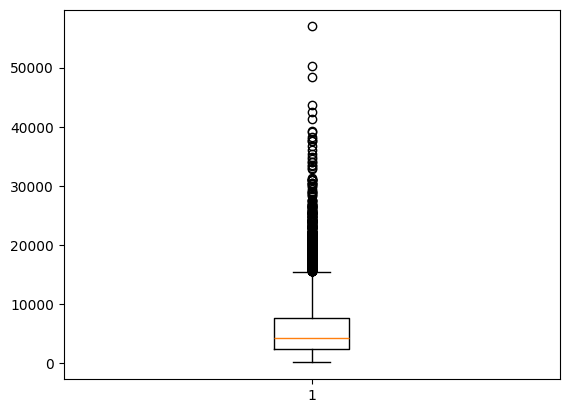

In [53]:
plt.boxplot(cleaned_dataset["cost"]); # Matplotlib prints things while plotting, the semicolon an suppress it.

A boxplot provides a comprehensive view of a dataset's distribution, offering more detailed insights than typical tables. The central line within the box represents the median, splitting the data into its lower and upper halves. The box itself is framed by two lines: the lower boundary represents the 25th percentile (or Q1), meaning 25% of the data lies below this value, and the upper boundary denotes the 75th percentile (or Q3), indicating that 75% of the data is below this point.

The range between Q3 and Q1 is known as the Interquartile Range (IQR). Beyond the box, the plot extends 'whiskers'. Their "distance" is calculated as `1.5 * IQR` both above and below the box, providing a range for typical data points. Any data outside these whiskers can be considered outliers.

##### ❓ What other plots would make sense? Make them.

Histograms on age and cost as well.

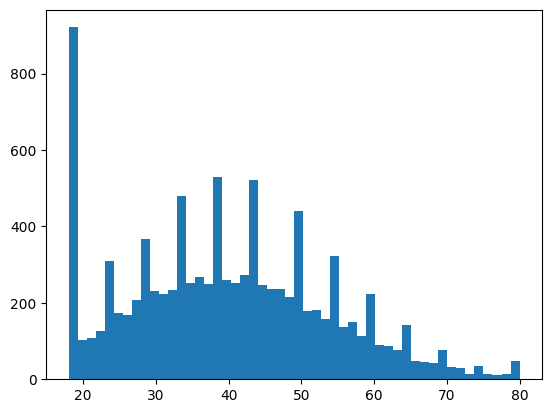

In [61]:
plt.hist(cleaned_dataset["age"], bins=50);

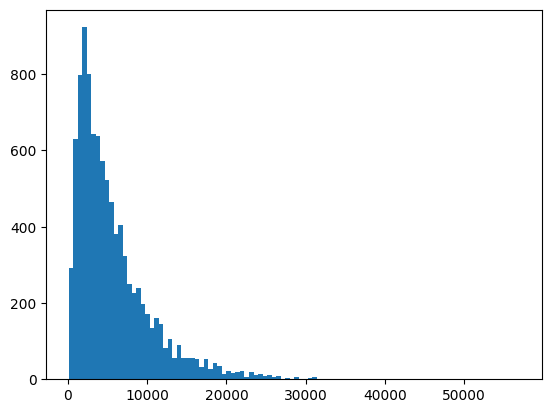

In [57]:
plt.hist(cleaned_dataset["cost"], bins=100);

For categorical data, categories can often serve as a basis for comparison in other plots, like boxplots. This means you can use a single category to differentiate data within such plots. You can also produce the same type of plot multiple times, once for each category, to analyze patterns within individual categories.


| Plot Type     | Description                                          | When to Use                                         |
|---------------|------------------------------------------------------|-----------------------------------------------------|
| **Count Plot**| Represents the frequency or count of each category.  | To see how often each category appears in the data. |